# load and clean the Application data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns

In [2]:
app = pd.read_csv('credit_application_data.csv')

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app.shape

(307511, 122)

## Reduce columns to the ones that will be needed later. 

# DROP data about living circumstances
- Name_Type_Suite = who accompanyed the client when he/she applied. 
- REGION_RATING_CLIENT, REGION_RATING_CLIENT = region rating of bank.
- EXT_SOURCE_1-3 = Normalized score from external source
- APARTMENTS_AVG
- BASEMENTAREA_AVG
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BUILD_AVG
- COMMONAREA_AVG
- ELEVATORS_AVG
- ENTRANCES_AVG
- FLOORSMAX_AVG
- FLOORSMIN_AVG
- LANDAREA_AVG
- LIVINGAPARTMENTS_AVG
- LIVINGAREA_AVG
- NONLIVINGAPARTMENTS_AVG
- NONLIVINGAREA_AVG
- APARTMENTS_MODE
- BASEMENTAREA_MODE
- YEARS_BEGINEXPLUATATION_MODE
- YEARS_BUILD_MODE
- COMMONAREA_MODE
- ELEVATORS_MODE
- ENTRANCES_MODE
- FLOORSMAX_MODE
- FLOORSMIN_MODE
- LANDAREA_MODE
- LIVINGAPARTMENTS_MODE
- LIVINGAREA_MODE
- NONLIVINGAPARTMENTS_MODE
- NONLIVINGAREA_MODE
- APARTMENTS_MEDI
- BASEMENTAREA_MEDI
- YEARS_BEGINEXPLUATATION_MEDI
- YEARS_BUILD_MEDI
- COMMONAREA_MEDI
- ELEVATORS_MEDI
- ENTRANCES_MEDI
- FLOORSMAX_MEDI
- FLOORSMIN_MEDI
- LANDAREA_MEDI
- LIVINGAPARTMENTS_MEDI
- LIVINGAREA_MEDI
- NONLIVINGAPARTMENTS_MEDI
- NONLIVINGAREA_MEDI
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- TOTALAREA_MODE
- WALLSMATERIAL_MODE
- EMERGENCYSTATE_MODE 


In [5]:
app = app.drop(['WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','NAME_TYPE_SUITE',\
                        'REGION_RATING_CLIENT','REGION_RATING_CLIENT','EXT_SOURCE_1','EXT_SOURCE_2',\
                        'EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',\
                        'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',\
                        'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG',\
                        'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',\
                        'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',\
                        'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',\
                        'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI',\
                        'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',\
                        'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',\
                        'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI',\
                        'FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE'],axis = 1)
    
app.shape

(307511, 70)

### --> This reduced the columns from 122 to 70. 

# Data Quality and Missing Values

In [6]:
app_null = app.isnull().sum()*100/len(app)
app_null = app_null.sort_values(ascending = False)

In [7]:
print(f'The largest % of null values in a column: {round(max(app_null[app_null>0]),2)}%')
print(f'The smallest % of null values in a column: {min(app_null.values)}%')

print(f'Amount of rows with null values: {app_null[app_null>0].shape[0]}')
print(f'Amount of rows without null values:  {app.shape[1] - app_null[app_null > 0].shape[0]}')

The largest % of null values in a column: 65.99%
The smallest % of null values in a column: 0.0%
Amount of rows with null values: 16
Amount of rows without null values:  54


In [8]:
print(f'The amount of columns that have more than 50% of missing values:\
{app_null[app_null>50].shape[0]}')
print(f'That is {round((app_null[app_null>50].shape[0]/app.shape[1])*100,2)}% of all columns')

The amount of columns that have more than 50% of missing values:1
That is 1.43% of all columns


### Graph of amount of null values in each column

In [9]:
# function to get null value
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [10]:
NA_col = column_wise_null_percentage(app)
NA_col.shape

(70,)

## Graph to show amount of null values in colums. 
- Only include columns that have at least 1% null value

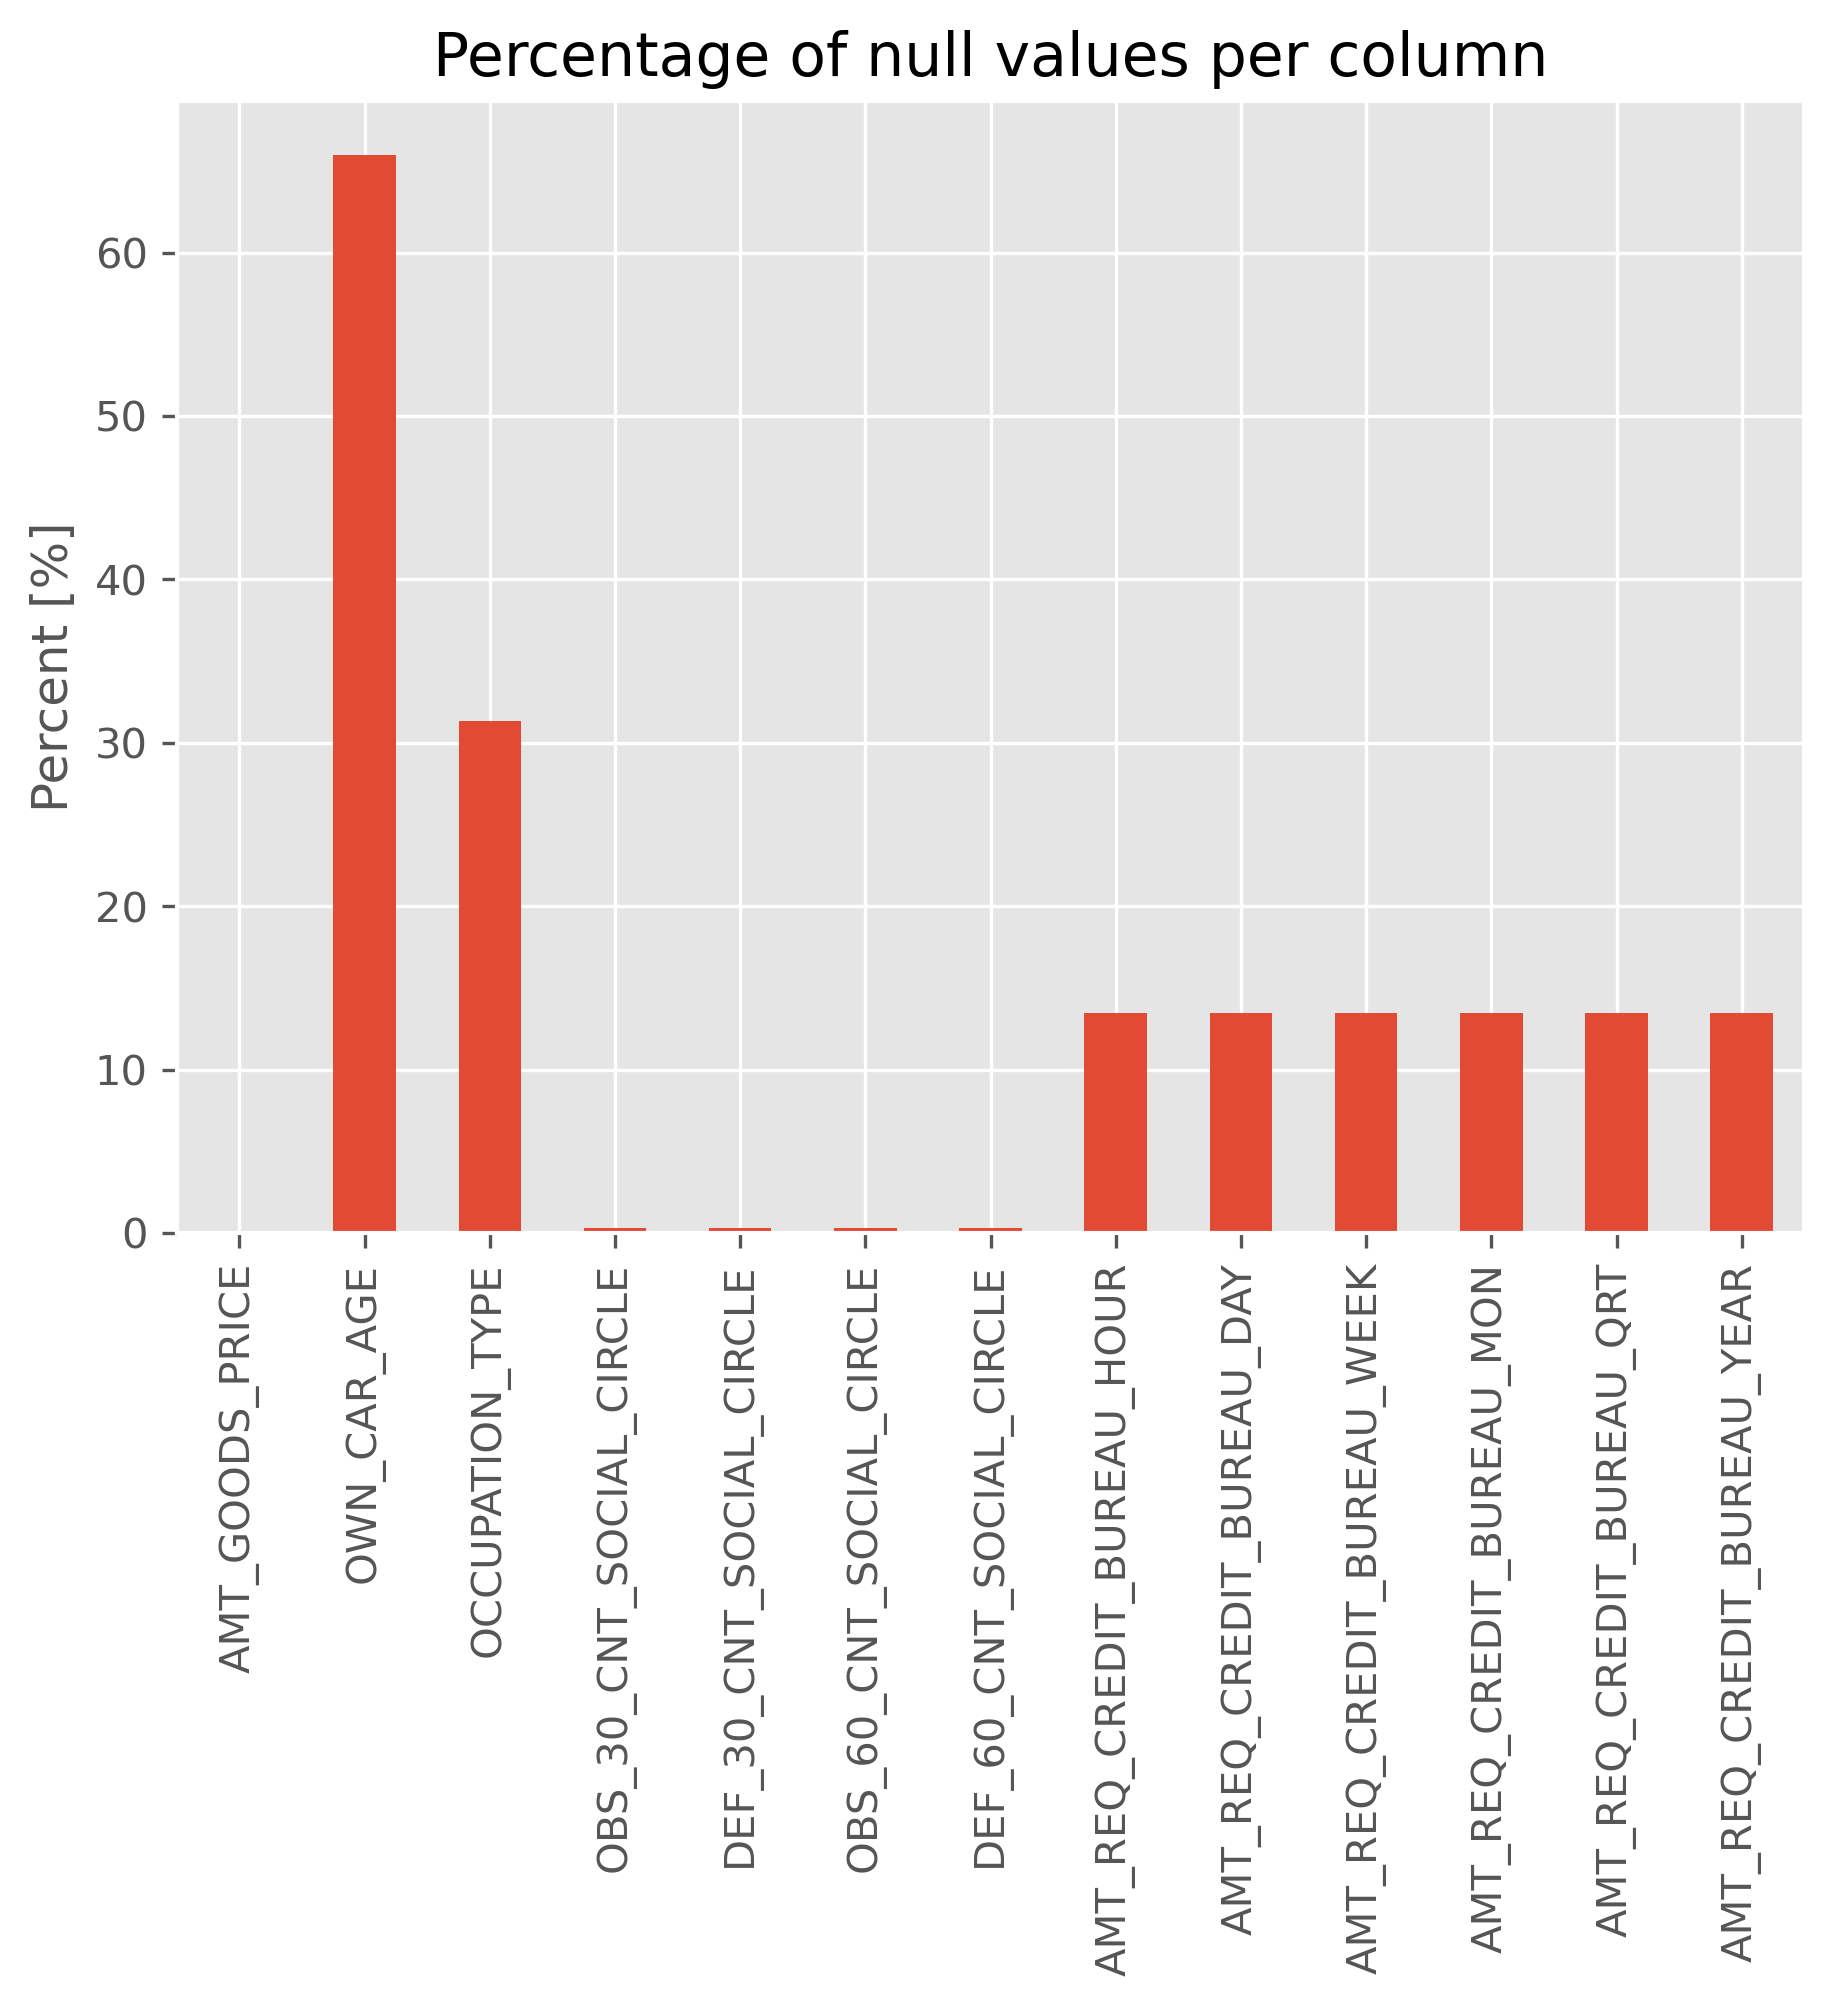

In [11]:
plt.figure(figsize = (7,5),dpi = 300)
NA_col[NA_col > 0].plot(kind = 'bar')
plt.title('Percentage of null values per column')
plt.ylabel('Percent [%]')
plt.show()

### Remove the two colums with high percentage of null values
- OWN_CAR_AGE
- OCCUPATION_TYPE

In [12]:
app = app.drop(['OWN_CAR_AGE','OCCUPATION_TYPE'],axis = 1)

In [13]:
app.shape


(307511, 68)

######  --> 68 columns left

## Clean up Gender Column

In [14]:
app['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [15]:
app['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Drop the 4 rows that have the XNA as Gender

In [16]:
print(app.shape)
app = app[app['CODE_GENDER'] != 'XNA']
print(app.shape)

(307511, 68)
(307507, 68)


# Convert times in negative days, to years. 
- replacing the DAYS_BIRTH column to age (in year)
- converting DAYS_EMPLOYED to years
- converting DAYS_REGISTRATION and DAYS_ID_PUBLISHED to years

In [17]:
age = round(app['DAYS_BIRTH'].abs()/365,2)
app.rename(columns = {'DAYS_BIRTH':'age'},inplace = True)
app['age']=age

app.rename(columns = {'DAYS_BIRTH':'age','DAYS_EMPLOYED':'employed','DAYS_REGISTRATION':'registration','DAYS_ID_PUBLISHED':'id_pub'}, inplace = True )
app['age']= round(app['age'].abs()/365,2)
app['employed'] = round(app['employed'].abs()/365,2)
app['registration'] = round(app['registration'].abs()/365,2)
app['id_pub'] = round(app['registration'].abs()/365,2)


In [18]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'age', 'employed', 'registration',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCU

# Check for outliers

In [19]:
columns = ['CNT_CHILDREN','AMT_INCOME_TOTAL',\
     'AMT_CREDIT','AMT_GOODS_PRICE',\
     'REGION_POPULATION_RELATIVE',\
     'age','employed','registration',\
           'id_pub',\
     'HOUR_APPR_PROCESS_START']

app[columns].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,age,employed,registration,id_pub,HOUR_APPR_PROCESS_START
count,307507.000000,3.075070e+05,3.075070e+05,3.072290e+05,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000
mean,0.417047,1.687977e+05,5.990286e+05,5.383977e+05,0.020868,0.120412,185.550275,13.660626,0.037354,12.063394
std,0.722119,2.371246e+05,4.024926e+05,3.694472e+05,0.013831,0.032901,382.041272,9.651733,0.026712,3.265835
min,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,0.000290,0.060000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,0.010006,0.090000,2.560000,5.510000,0.020000,10.000000
50%,0.000000,1.471500e+05,5.135310e+05,4.500000e+05,0.018850,0.120000,6.080000,12.340000,0.030000,12.000000
75%,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,0.028663,0.150000,15.640000,20.490000,0.060000,14.000000
max,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,0.072508,0.190000,1000.670000,67.590000,0.190000,23.000000


#### Box Plot for Children, income, credit, goods value, region, age, employed, registration, id, hour

In [20]:
plt.figure(figsize = (30,30), dpi = 300)
sns.set(font_scale = 2)
for i in enumerate(columns):
    plt.subplot(5,2,i[0]+1)
    b = sns.boxplot(x = i[1], data = app)
    b.set_ylabel(i[1], fontsize = 20)
    b.set_xlabel(i[1], fontsize = 30)
plt.show()


We can see that all columns, except HOURS_APPR_PROCESS_START and AGE have outliers. 


* Children: First qurtile is not there, due to the fact that most data is between 0 and 2.5 and there cannot be negative children. 

* Income has a large outlier. Its removal will drastically improve all analysis. 

* Credit amount and goods also have some outliers. We have to be carefull here, to not remove real data. 

* Time of employment has one large outlier. 

# REMOVE outliers

--> Filter income

In [37]:
filter_income = app[['AMT_INCOME_TOTAL']]
filter_income = filter_income.loc[filter_income.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis = 1)]

In [44]:
sns.set(font_scale = 1)
plt.figure(figsize = (15,5), dpi = 300)

plt.subplot(1,2,1)
b = sns.boxplot(x = 'AMT_INCOME_TOTAL', data = app)
b.set_ylabel('AMT_INCOME_TOTAL', fontsize = 12)
b.set_xlabel('AMT_INCOME_TOTAL', fontsize = 12)

plt.subplot(1,2,2)
b = sns.boxplot(x = 'AMT_INCOME_TOTAL', data = filter_income)
b.set_ylabel('AMT_INCOME_TOTAL', fontsize = 12)
b.set_xlabel('AMT_INCOME_TOTAL', fontsize = 12)


plt.show()


SyntaxError: invalid syntax (<ipython-input-44-5b0a9fae59ce>, line 18)

In [53]:

print('Minimum income before filtering')
print(app['AMT_INCOME_TOTAL'].min())


print('Minimum income AFTER filtering')
print(filter_income['AMT_INCOME_TOTAL'].min())

Minimum income before filtering
25650.0
Minimum income AFTER filtering
25650.0


In [55]:
print('Maximum income before filtering')
print(app['AMT_INCOME_TOTAL'].max())


print('Maximum income AFTER filtering')
print(filter_income['AMT_INCOME_TOTAL'].max())

Maximum income before filtering
117000000.0
Maximum income AFTER filtering
639000.0


--> Filter Credit amount

In [ ]:
print(min)